<a href="https://colab.research.google.com/github/Hugo-Pare/Effects-of-confinement-COVID-19/blob/master/Confinement_au_US.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lorsque le virus COVID-19 a frappé, chaque pays ont implementé leurs propres règles de confinement. Pour tester quel pays a le mieux gérer la situation, nous devons faire une analyse plus détaillée que de simplement regarder le graphique de cas total pour chaque pays. Voici comment se passe le confinement aux États-Unis :

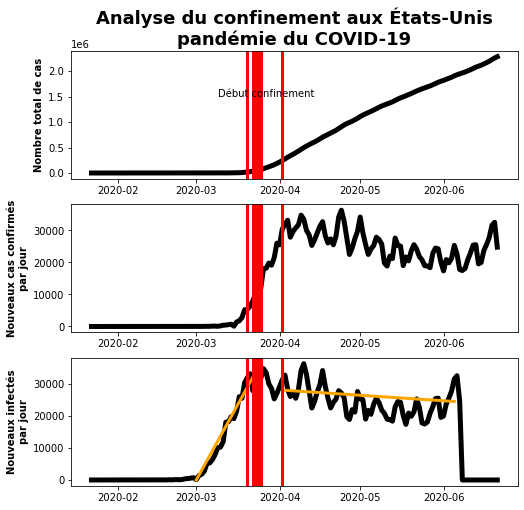

<Figure size 432x288 with 0 Axes>

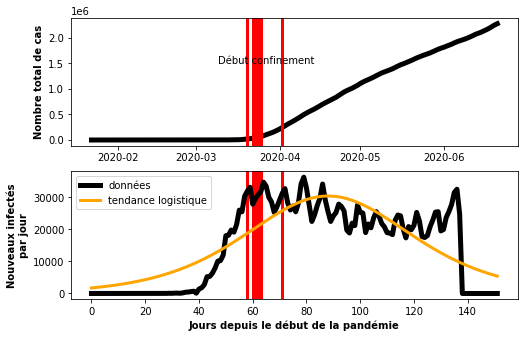

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from matplotlib import dates as mpl_dates
from datetime import datetime
from scipy import optimize

#---- Toutes les données du COVID-19 sont enregistrés quotidiennement dans un document csv.

URL_DATASET = r'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'
df1 = pd.read_csv(URL_DATASET)

#---- Dans le document csv, il y a les données de toutes les pays. Il faut donc lire seulement les informations de l'Allemagne.

df_US = df1[df1['Country'] == 'US']

#---- Dans le document, il y a plusieurs informations :la date, le nombre de cas confirmé, le nombre de personnes qui ont survécu au virus et ceux qui sont décédé dû au virus. Il faut donc prendre seulement les données des cas
#---- confirmés et la date.

cas = df_US['Confirmed']   

date = pd.to_datetime(df_US["Date"])

#---- On créé la première figure contenant 3 graphiques
#---- 1e graphique

plt.figure(figsize=(8,8))

plt.subplot(311)                              
plt.plot(date, cas, "k", linewidth=5)
plt.ylabel("Nombre total de cas", fontsize=10, fontweight='bold')

#---- Pour changer les numéros en date

#print(date.iloc[71])                                           

#---- Ajouter des lignes de repères verticales sur le graphique

plt.axvline(date.iloc[58], color = 'r', linewidth=3)   #État de New York demande à la population de rester chez-soi(20mars2020)
plt.axvline(date.iloc[60], color = 'r', linewidth=3)   #État de Ohio (22mars2020)
plt.axvline(date.iloc[61], color = 'r', linewidth=3)   #États du Massachusetts, du Michigan, d'Indiana, de la Virginie de l'ouest, d'Oregon, du Nouveau-Mexique, de Washington, d'Hawaii (23mars2020)
plt.axvline(date.iloc[62], color = 'r', linewidth=3)   #État du Wisconsin (24mars2020)
plt.axvline(date.iloc[63], color = 'r', linewidth=3)   #État du Idaho (25mars2020)
plt.axvline(date.iloc[71], color = 'r', linewidth=3)   #État de la Georgie (2avril2020)

#---- Ajouter un titre

plt.title("Analyse du confinement aux États-Unis\npandémie du COVID-19", fontsize=18, fontweight='bold')

#---- Ajouter du texte dans le graphique, début du confinement / début du déconfinement

plt.text(date.iloc[47], 1500000, 'Début confinement', fontsize=10)

#plt.text(date.iloc[104], 105000, 'Début déconfinement', fontsize=10)


#---- n pour nombre de lignes et on créé un tableau rempli de 0, et on spécifie que ce sera des nombres entiers.

n = np.size(cas)                      
nouveaux_cas = np.zeros(n, dtype=int)  
                                   
#---- Faire la dérivée du premier graphique en créant une boucle à partir des lignes du tableau. On obtient le nombre de nouveaux cas entre la date à la ligne 'i' et la date de la veille à la ligne 'i - 1'.

for i in range(1,n):
    new_cases = cas.iloc[i] - cas.iloc[i - 1]
    nouveaux_cas[i] = new_cases

#---- 2e graphique de la première figure

plt.subplot(312)

plt.plot(date, nouveaux_cas, "k", linewidth=5)
plt.ylabel("Nouveaux cas confirmés\npar jour", fontsize=10, fontweight='bold')

#---- Ajouter des lignes de repères verticales sur le graphique

plt.axvline(date.iloc[58], color = 'r', linewidth=3)   #État de New York demande à la population de rester chez-soi(20mars2020)
plt.axvline(date.iloc[60], color = 'r', linewidth=3)   #État de Ohio (22mars2020)
plt.axvline(date.iloc[61], color = 'r', linewidth=3)   #États du Massachusetts, du Michigan, d'Indiana, de la Virginie de l'ouest, d'Oregon, du Nouveau-Mexique, de Washington, d'Hawaii (23mars2020)
plt.axvline(date.iloc[62], color = 'r', linewidth=3)   #État du Wisconsin (24mars2020)
plt.axvline(date.iloc[63], color = 'r', linewidth=3)   #État du Idaho (25mars2020)
plt.axvline(date.iloc[71], color = 'r', linewidth=3)   #État de la Georgie (2avril2020)

#---- Le 2e graphique décalé vers la gauche de 14 jours, puique le virus prend en(voir source WHO) moyenne de 5 à 6 jours avant de voir des symptomes chez une personne, cela peut prendre jusqu'à 14 jours
#---- alors le graphique est décalé de 14 jours.

#---- On refait le même graphique, mais on avance le graphique de 14 jours et on ajoute 14 zéros à la fin.
vrais_cas = np.array(nouveaux_cas[14:])
vraiscas = np.append(vrais_cas, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#print(vraiscas)

#---- 3e graphique de la première figure

plt.subplot(313) 

plt.plot(date, vraiscas, "k", linewidth=5)
plt.ylabel("Nouveaux infectés\npar jour", fontsize=10, fontweight='bold')

#---- Estimation du R0

plt.plot([date.iloc[39], date.iloc[60]],[0, 32000], "orange", linewidth=3, label= "Estimation de R0")

plt.plot([date.iloc[72], date.iloc[135]], [28000, 24500], "orange", linewidth=3, label= "Estimation de R0")

#---- Ajouter des lignes de repères verticales sur le graphique

plt.axvline(date.iloc[58], color = 'r', linewidth=3)   #État de New York demande à la population de rester chez-soi(20mars2020)
plt.axvline(date.iloc[60], color = 'r', linewidth=3)   #État de Ohio (22mars2020)
plt.axvline(date.iloc[61], color = 'r', linewidth=3)   #États du Massachusetts, du Michigan, d'Indiana, de la Virginie de l'ouest, d'Oregon, du Nouveau-Mexique, de Washington, d'Hawaii (23mars2020)
plt.axvline(date.iloc[62], color = 'r', linewidth=3)   #État du Wisconsin (24mars2020)
plt.axvline(date.iloc[63], color = 'r', linewidth=3)   #État du Idaho (25mars2020)
plt.axvline(date.iloc[71], color = 'r', linewidth=3)   #État de la Georgie (2avril2020)


#---- 2e figure de 3 graphiques - trouver des points d'inflexion dans la courbe
#---- 1e graphique

plt.figure()

plt.figure(figsize=(8,8))

plt.subplot(311)                               
plt.plot(date, cas, "k", linewidth=5)
plt.ylabel("Nombre total de cas", fontsize=10, fontweight='bold')

#---- Ajouter des lignes de repères verticales sur le graphique

plt.axvline(date.iloc[58], color = 'r', linewidth=3)   #État de New York demande à la population de rester chez-soi(20mars2020)
plt.axvline(date.iloc[60], color = 'r', linewidth=3)   #État de Ohio (22mars2020)
plt.axvline(date.iloc[61], color = 'r', linewidth=3)   #États du Massachusetts, du Michigan, d'Indiana, de la Virginie de l'ouest, d'Oregon, du Nouveau-Mexique, de Washington, d'Hawaii (23mars2020)
plt.axvline(date.iloc[62], color = 'r', linewidth=3)   #État du Wisconsin (24mars2020)
plt.axvline(date.iloc[63], color = 'r', linewidth=3)   #État du Idaho (25mars2020)
plt.axvline(date.iloc[71], color = 'r', linewidth=3)   #État de la Georgie (2avril2020)

#---- Ajouter un titre à la deuxième figure

#plt.title("Analyse du confinement aux États-Unis\npandémie du COVID-19", fontsize=18, fontweight='bold')

#---- Ajouter du texte dans le graphique, début du confinement / début du déconfinement

plt.text(date.iloc[47], 1500000, 'Début confinement', fontsize=10)

#plt.text(date.iloc[104], 105000, 'Début déconfinement', fontsize=10)


#---- 2e graphique de la deuxième figure
#---- On refait le 3e graphique de la première figure, celui dont les données sont décalés de 14 jours

plt.subplot(312)

vrais_cas = np.array(nouveaux_cas[14:])
vraiscas = np.append(vrais_cas, np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))  

#---- Pour réussir à faire une courbe de tendance, il a fallu changer les dates (Année, mois, jour) en le nombre de jours écoulés depuis la première journée

N  = len(date)

days = []
for i in range(N):
    days.append(i)

#---- Ajouter une courbe de tendance dans le deuxième graphique
#---- Définir la dérivée de la fonction logistique (fonction utilisé pour les propagations de virus)    
def logistique_deriv(x, x0, a, b, c):
    dx = x - x0
    exp = np.exp(-c*dx)
    return a*exp/(1.0 + b*exp)**2

# L'erreur dans le bloc de code suivant vient du faire que tu essayes de mettre
# sur le même graphique des données avec un axe x de temps (type date) et les autres 
# un nombre de jours (type entier). Il faut tout mettre en jours.

 
#---- Ajouter des lignes de repères verticales sur le graphique

plt.axvline(58, color = 'r', linewidth=3)   #État de New York demande à la population de rester chez-soi(20mars2020)
plt.axvline(60, color = 'r', linewidth=3)   #État de Ohio (22mars2020)
plt.axvline(61, color = 'r', linewidth=3)   #États du Massachusetts, du Michigan, d'Indiana, de la Virginie de l'ouest, d'Oregon, du Nouveau-Mexique, de Washington, d'Hawaii (23mars2020)
plt.axvline(62, color = 'r', linewidth=3)   #État du Wisconsin (24mars2020)
plt.axvline(63, color = 'r', linewidth=3)   #État du Idaho (25mars2020)
plt.axvline(71, color = 'r', linewidth=3)   #État de la Georgie (2avril2020)

plt.ylabel("Nouveaux infectés\npar jour", fontsize=10, fontweight='bold')

plt.plot(days, vraiscas, "k", linewidth=5, label="données")

#---- Optimiser les données et créé la courbe de tendance

params, params_covariance = optimize.curve_fit(logistique_deriv, days, vraiscas, p0 = [60.0, 0.0, 0.0, 0.0])
plt.plot(days, logistique_deriv(days, *params), "orange", linewidth=3, label="tendance logistique")

plt.xlabel("Jours depuis le début de la pandémie", fontsize=10, fontweight='bold')

#---- Insérer une légende

plt.legend()

#---- 3e graphique de la 2e figure (C'est la dérviée seconde, mais le cas des États-Unis est particulier, car )

#plt.subplot(313)


def logistique_deriv2(x, x0, a, b, c):
    dx = x - x0
    exp2 = np.exp(-c*dx)
    return (a*exp2/(1.0 + b*exp2)**2)-2*(a**2)*(exp2/(1.0 + b*exp2)**2)

d = np.size(cas)                      
cas_deriv2 = np.zeros(d, dtype=int)

for i in range(1,d):
    casderiv2 = vraiscas[i] - vraiscas[i - 1]
    cas_deriv2[i] = casderiv2

# Même erreur que plus haut. Il faut utiliser days plutôt que date pour l'axe x

#plt.axvline(58, color = 'r', linewidth=3)   #État de New York demande à la population de rester chez-soi(20mars2020)
#plt.axvline(60, color = 'r', linewidth=3)   #État de Ohio (22mars2020)
#plt.axvline(61, color = 'r', linewidth=3)   #États du Massachusetts, du Michigan, d'Indiana, de la Virginie de l'ouest, d'Oregon, du Nouveau-Mexique, de Washington, d'Hawaii (23mars2020)
#plt.axvline(62, color = 'r', linewidth=3)   #État du Wisconsin (24mars2020)
#plt.axvline(63, color = 'r', linewidth=3)   #État du Idaho (25mars2020)
#plt.axvline(71, color = 'r', linewidth=3)   #État de la Georgie (2avril2020)

# Pour la dérivée 2e, c'est comme pour l'Allemagne. On veut utiliser les paramètres
# obtenus pour loergistique_deriv() et ensuite calculer la dérivée deuxième.

# plt.plot(days, cas_deriv2, "k", linewidth=5, label="données")

# params2, params_covariance2 = optimize.curve_fit(logistique_deriv2, days, cas_deriv2)

# plt.plot(days, logistique_deriv2(days, *params2), "orange", linewidth=3, label="tendance logistique")

#deriv_2 = np.gradient(logistique_deriv(days, *params))
#plt.plot(days, deriv_2, "orange", linewidth=3, label="tendance logistique")

#plt.legend()

plt.xlabel("Jours depuis le début de la pandémie", fontsize=10, fontweight='bold')

plt.show()

**Légende de couleur:**
Dates importantes du confinement

- Les lignes rouges représentent les différents états qui ont imposés un confinement : New York, Ohio, Massachusetts, Michigan, Indiana, Virginie de l'Ouest, Oregon, Nouveau-Mexique, Washington, Hawaii, Wisconsin, Idaho et Georgie ([du 20 mars au 2 avril 2020](https://en.wikipedia.org/wiki/COVID-19_pandemic_lockdowns#United_States)).

**Note que plusieurs états américains (Arkansas, Iowa, Dakota nord, Dakota sud et Wyoming) n'ont aucunes règles de confinement.

**Graphiques 1 et 4 :** Ces graphiques indiquent le nombre de cas de COVID-19 total aux États-Unis. Ces graphiques ne représentent que le nombre de personnes touchées et rien d'autre peut nous être transmis par ce graphique.

**Graphique 2 :** Le deuxième graphique est la dérivée du premier graphique, celui du nombre total de cas. Cela veut donc dire qu'il représente le nombre de nouveau cas par jour. Seulement par ce graphique, les mesures prises par les États-Unis ne semblent pas assez strictes puisque le nombre de cas continue d'augmenter même après les restrictions. Il est encore impossible de savoir si le confinement a fonctionné, car ce sont seulement les personnes qui ont testés positif qui sont affichés sur le graphique.

**Graphique 3 :** Le troisième graphique est le deuxième graphique décalé de 14 jours. Une personne ayant le virus prend en moyenne de 5 à 6 jours avant d'avoir des symptomes, mais cela peut prendre jusqu'à 14 jours ([source du WHO](https://www.who.int/health-topics/coronavirus#tab=tab_3)). C'est pour cette raison que le deuxième graphique n'indique rien puisque plusieurs personnes transportent le virus, mais ne le savent pas encore. C'est durant les prochains jours qu'ils testeront positifs. De plus, la ligne jaune représente les données utilisées pour calculer le R0.

**Graphique 5 :** Le cinquième graphique est semblable au 3e graphique, par contre on insert une courbe de tendance logistique. Dans ce cas-si c'est la dérivée de [la fonction logistique](https://fr.wikipedia.org/wiki/Fonction_logistique_(Verhulst)) :

$$f(x)= \frac{a}{1+ be^{-c(x-x0)}}$$

Sa dérivée : 

$$g(x) = a\frac{e^{-c(x-x0)}}{(1+ be^{-c(x-x0)})^2}$$

Dans le cas des États-Unis, la courbe de tendance ne suit pas le nombre de nouveaux cas par jour. Il y a plusieurs raisons:
- Certains états ont des règles de confinement
- Certains états n'ont aucunes règles de confinement
- La population de certains états ne respecte pas les consignes de confinement

Pour ces raisons, le confinement aux États-Unis ne fonctionne pas. Le gouvernement doit imposer des règles strictes à tous les états pour essayer de freiner la propagation du virus.

**Estimation du R0 :**

x = écart de jours

r = R0

$$f(x) = (r)^{x}$$

**R0 avant le confinement:**

Du jour 39 au jour 60
$$f(21) = (r)^x$$
$$32000 = (r)^x$$
$$r = 1,639$$

**R0 après le confinement:**

Du jour 72 au jour 135
$$f(63) = 1350(r)^x$$
$$380 = 1350(r)^x$$
$$r = 0,998$$